# ECSE 415 Assignment 1

In [1]:
path = "/content/drive/MyDrive/School/ECSE 415/Assignments/Assignment_1/images/"
import numpy as np
!pip install opencv-contrib-python==4.4.0.44
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## 1. Denoising

In [2]:
# Function comes from tutorial. Creates a gaussian kernel
def gaussian_kernel(size, sigma=1):
    '''
    param: size - size of gaussian kernel (square kernel)
           sigma - sigma for gaussain (default - 1)
    '''
    size = int(size) // 2 # 3
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * (sigma**2))
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    
    # normalize the kernel -- but why? -- didn't we just normalized it with normal variable
    g = g / np.sum(g)

    # return g, x, y
    return g

In [3]:
# function applies a 3x3 filter
def filtering(gray, kernel):
    height, width = gray.shape
    blur = np.zeros(gray.shape) # initializing a new image to receive the result of the operation

    gray = np.insert(gray, 0, 0, axis=1) # insert a row of 0s at the top
    gray = np.insert(gray, 0, 0, axis=0) # insert a column of 0s on the left
    gray = np.insert(gray, np.size(gray, 1), 0, axis=1) # insert a row of 0s at the bottom
    gray = np.insert(gray, np.size(gray, 0), 0, axis=0) # insert a column of 0s on the right

    # applying the filter
    for row in range(0, height):
        for column in range(0, width):
            blur[row, column] += kernel[0,0]*gray[row, column]
            blur[row, column] += kernel[0,1]*gray[row, column+1]
            blur[row, column] += kernel[0,2]*gray[row, column+2]
            blur[row, column] += kernel[1,0]*gray[row+1, column]
            blur[row, column] += kernel[1,1]*gray[row+1, column+1]
            blur[row, column] += kernel[1,2]*gray[row+1, column+2]
            blur[row, column] += kernel[2,0]*gray[row+2, column]
            blur[row, column] += kernel[2,1]*gray[row+2, column+1]
            blur[row, column] += kernel[2,2]*gray[row+2, column+2]
    
    return blur

(640, 480, 3)
(640, 480)


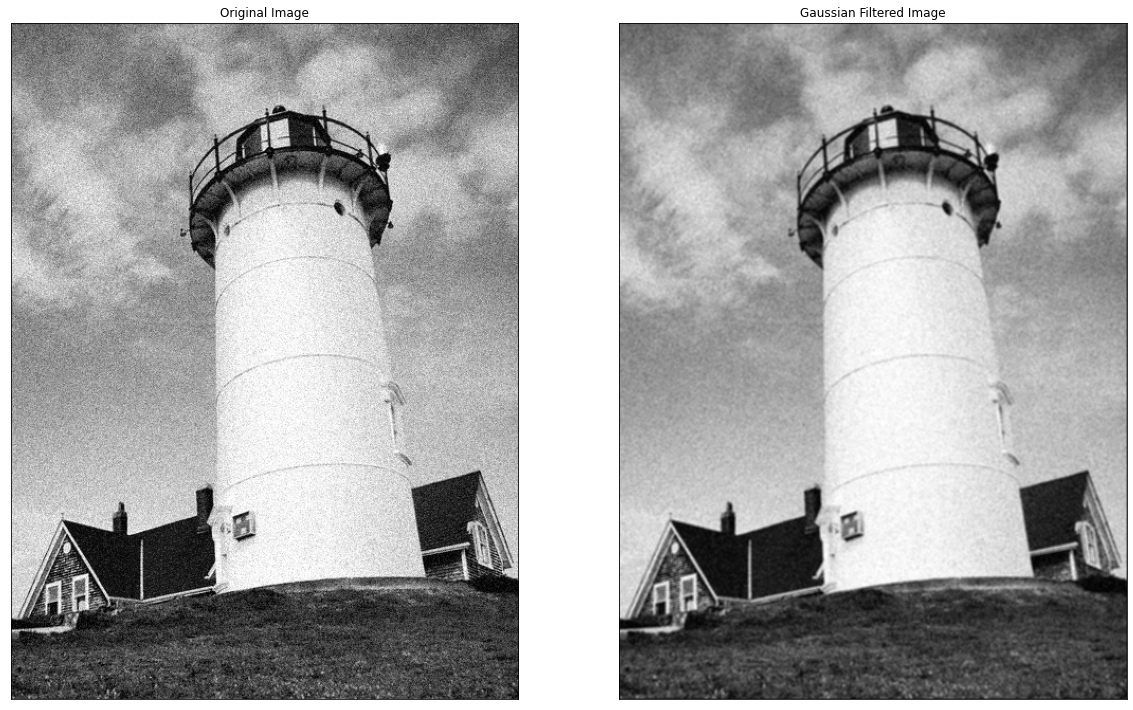

In [4]:
image_path = path+"gaussian_lighthouse.png"
img = cv2.imread(image_path)

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

kernel = gaussian_kernel(3, 2)  # creating a gaussian kernel
blur = filtering(gray, kernel)  # using the kernel to filter the image

#displaying
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(gray, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur, cmap="gray")
plt.title("Gaussian Filtered Image"), plt.xticks([]), plt.yticks([])
plt.show()

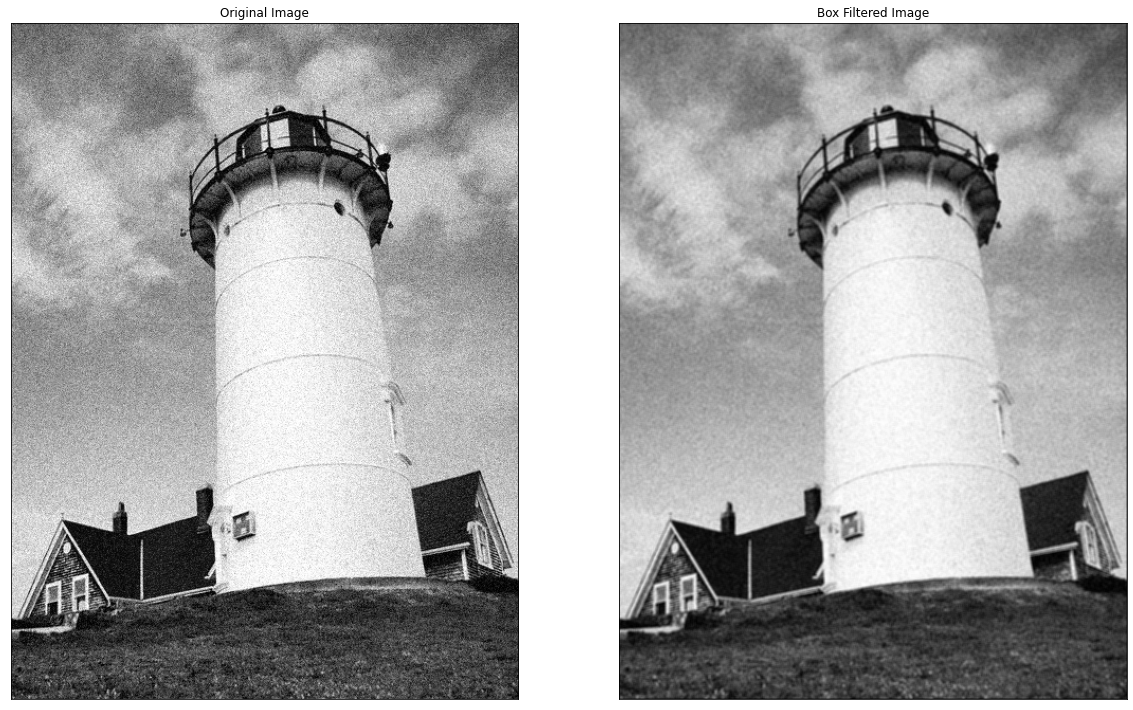

In [5]:
image_path = path+"gaussian_lighthouse.png"
img = cv2.imread(image_path)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

box_kernel = np.ones([3,3])/9
boxF = filtering(gray, box_kernel)

#displaying
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(gray, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(boxF, cmap="gray")
plt.title("Box Filtered Image"), plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = gray.astype(dtype=np.float64, copy=False)
s1 = "Peak-Signal-to-Noise-Ratio for gaussian: "
print(s1 + str(cv2.PSNR(gray, blur)))
s2 = "Peak-Signal-to-Noise-Ratio for box: "
print(s2 + str(cv2.PSNR(gray, boxF)))

Peak-Signal-to-Noise-Ratio for gaussian: 19.840855480117312
Peak-Signal-to-Noise-Ratio for box: 19.748355907346646


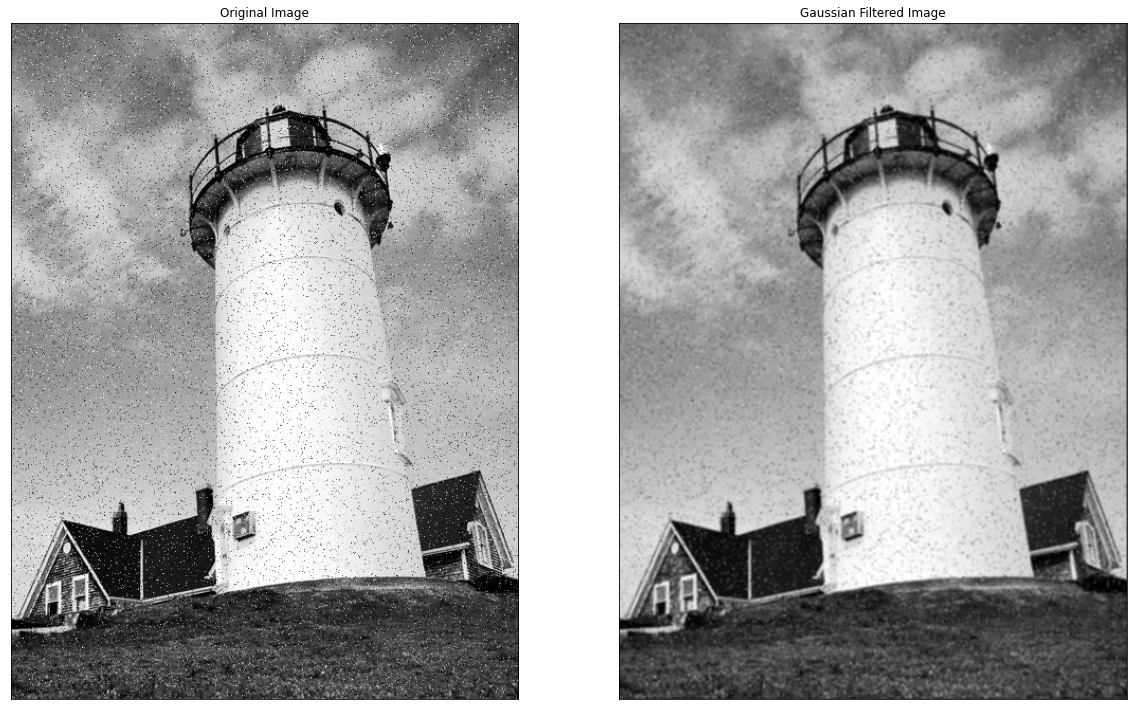

In [7]:
image_path = path + "saltandpepper_lighthouse.png"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

kernel = gaussian_kernel(3, 2)
blur3 = filtering(gray, kernel)

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(gray, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur3, cmap="gray")
plt.title("Gaussian Filtered Image"), plt.xticks([]), plt.yticks([])
plt.show()

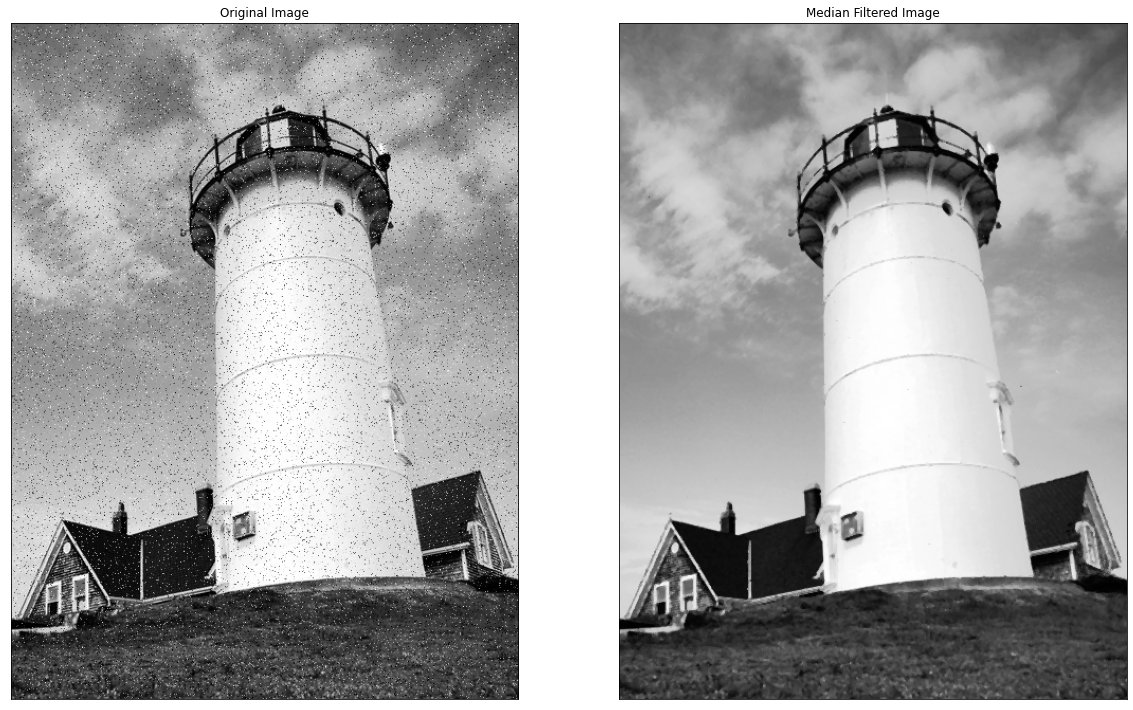

In [8]:
image_path = path + "saltandpepper_lighthouse.png"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

blurred = cv2.medianBlur(gray, 3)

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(gray, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blurred, cmap="gray")
plt.title("Median Filtered Image"), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = gray.astype(dtype=np.float64, copy=False)
s1 = "Peak-Signal-to-Noise-Ratio for gaussian filter: "
print(s1 + str(cv2.PSNR(gray, blur3)))
blurred = blurred.astype(dtype=np.float64, copy=False)
s2 = "Peak-Signal-to-Noise-Ratio for median filter: "
print(s2 + str(cv2.PSNR(gray, blurred)))

Peak-Signal-to-Noise-Ratio for gaussian filter: 18.93377758898779
Peak-Signal-to-Noise-Ratio for median filter: 18.402228689136805


##2. Canny Edge Detection

1: The four main steps of Canny Edge Detection are the following:
- First filter the image with the x- and y-derivatives of the Gaussian in order to remove the noise
- Then find the orientation and magnitude of the gradient
- Thin the wide "ridges" down to a single pixel width
- And finally, define two thresholds, one high and one low, create edge curves with the low threshold and finish them (continue them) with the low threshold

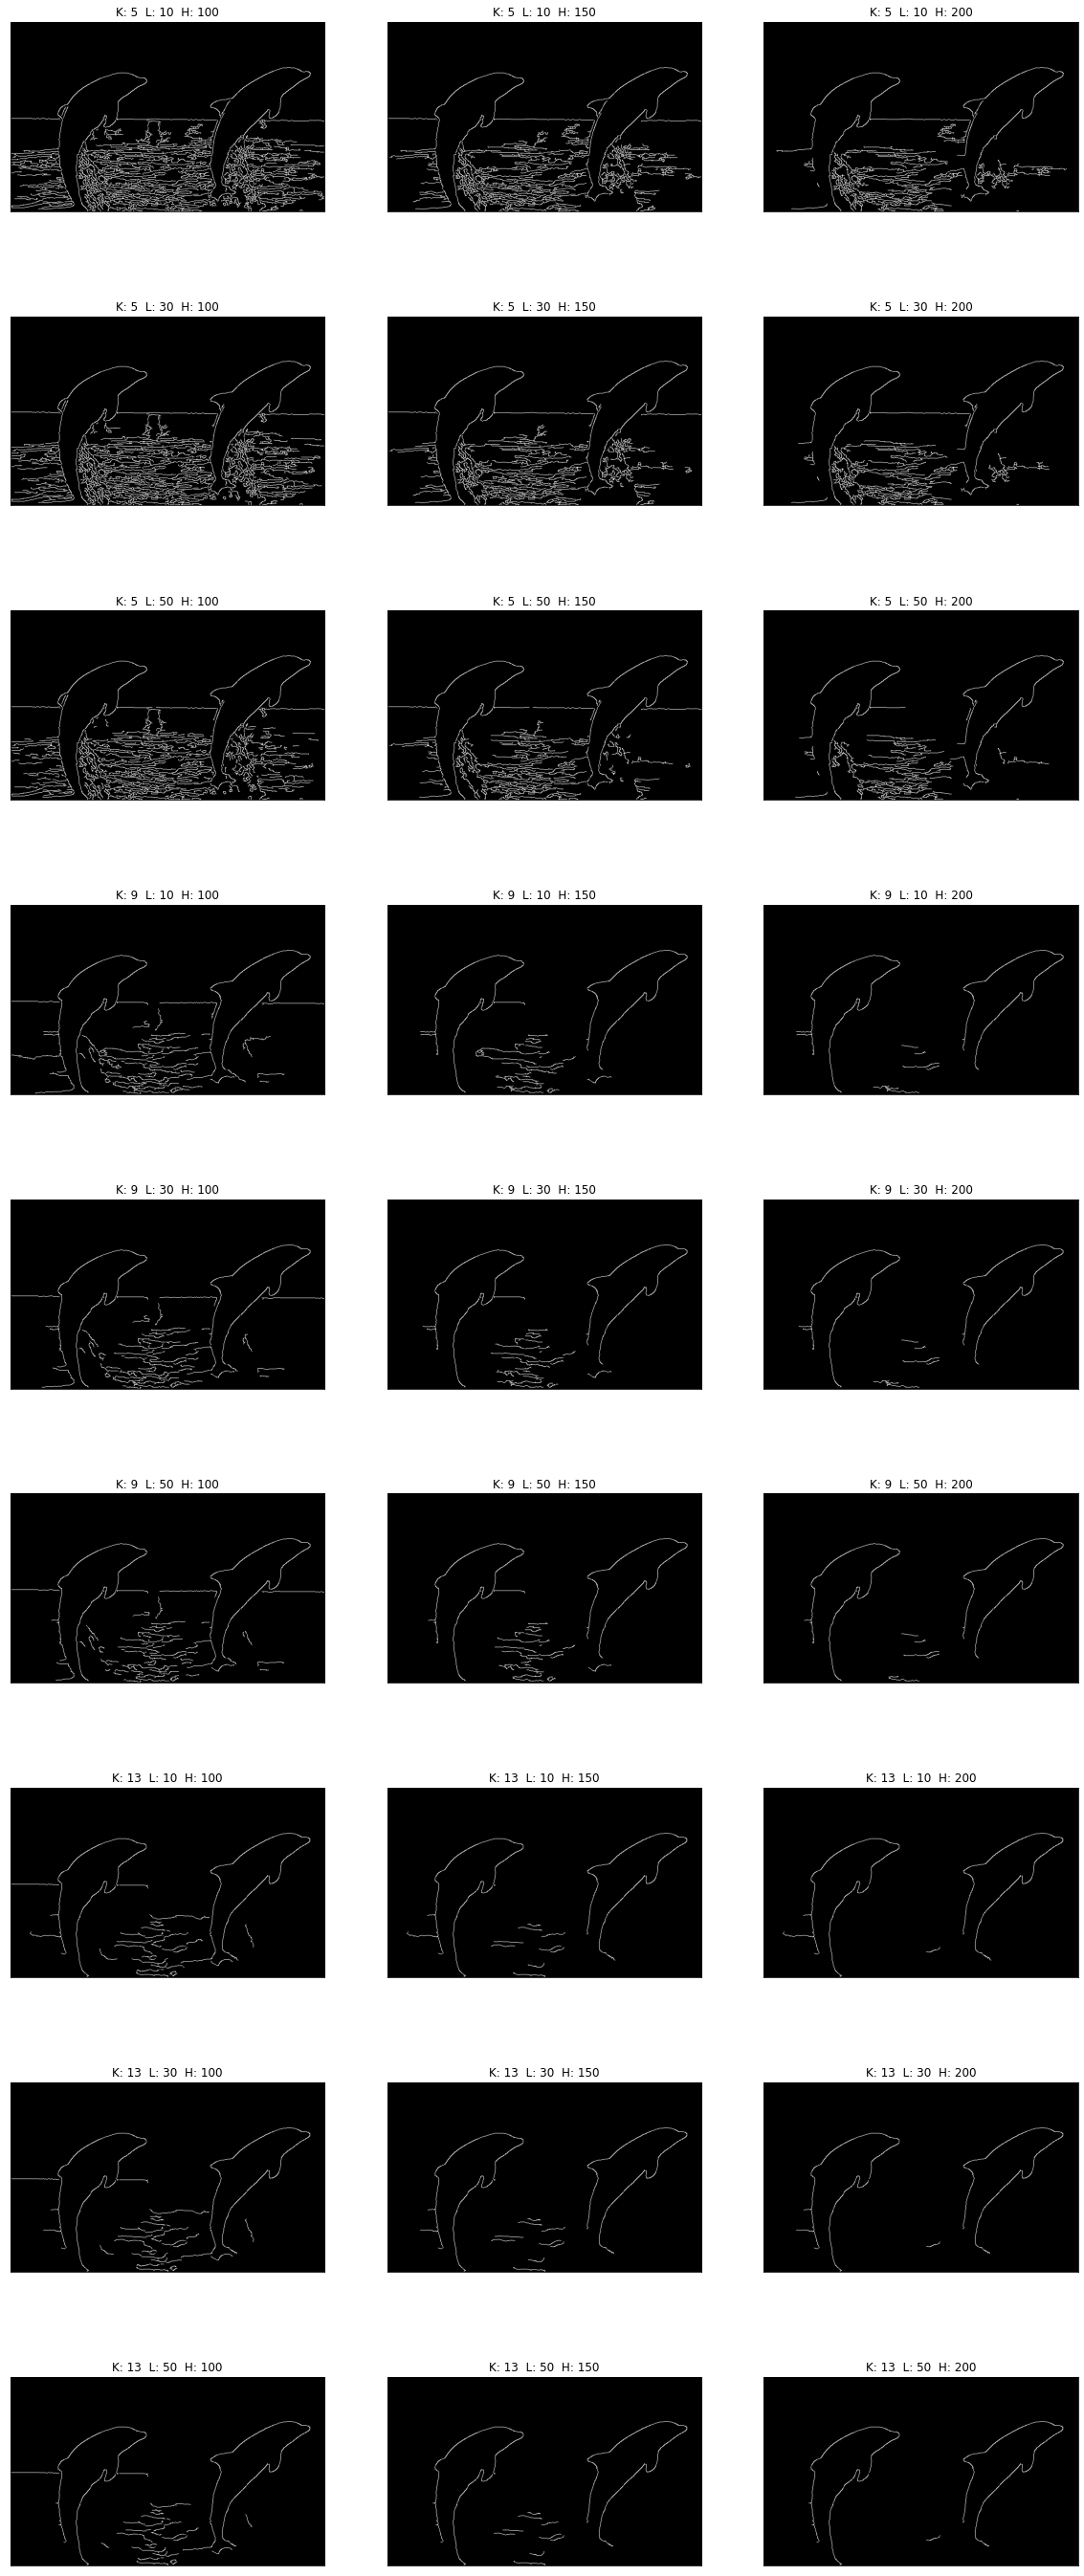

In [10]:
kArray = [5, 9, 13]
lArray = [10, 30, 50]
hArray = [100, 150, 200]

img = cv2.imread(path+"dolphin.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

liste = []
# using a variance of 3
for k in kArray:
    for l in lArray:
        for h in hArray:
            temp = cv2.GaussianBlur(gray, (k, k), sigmaX=3)
            output = cv2.Canny(temp, l, h)
            liste.append(output)

plt.figure(figsize=(20, 50))
j=0
for k in kArray:
    for l in lArray:
        for h in hArray:
            plt.subplot(9,3,j+1), plt.imshow(liste[j], cmap="gray")
            string = "K: " + str(k) + "  L: " + str(l) + "  H: " + str(h)
            plt.title(string), plt.xticks([]), plt.yticks([])    
            j+=1

3: Increasing the K value (kernel size) decreases the amount of detail in the picture and therefore reduces the number of edges that are detected (less sensitive). Likewise, increasing the L (low theshold) value decreases the detail that is picked up because the threshold to find an edge is higher. Again, increasing the H value (high threshold) decreases the amount of detail. The high threshold is related to the low threshold because it serves as a base before using the low threshold to connect the lines that are started.

(Text(0.5, 1.0, 'K: 13  L: 50  H: 200'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

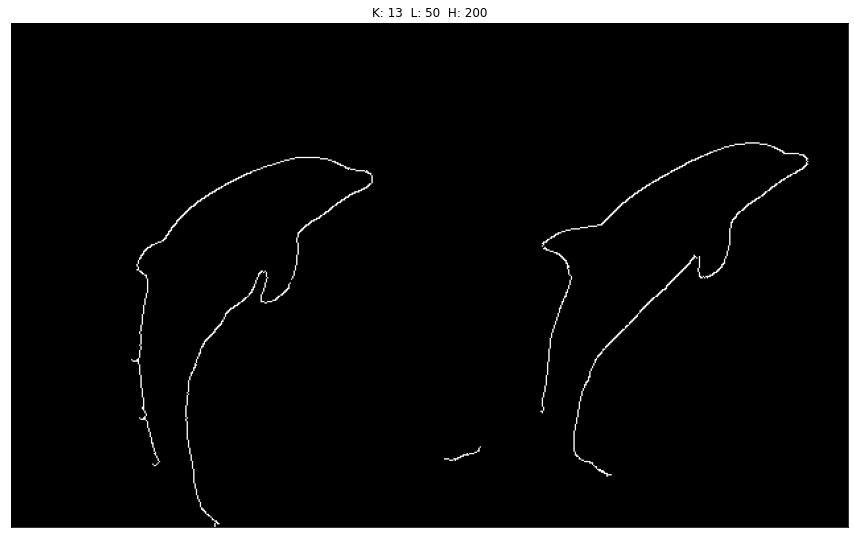

In [11]:
sigmaX = 3
k = 13
l = 50
h = 200

temp = cv2.GaussianBlur(gray, (k, k), sigmaX)
output = cv2.Canny(temp, l, h)

plt.figure(figsize=(15, 15))
plt.imshow(output, cmap="gray")
string = "K: " + str(k) + "  L: " + str(l) + "  H: " + str(h)
plt.title(string), plt.xticks([]), plt.yticks([])    

Parameters of K=13, L=50 and H=200 give the best results, leaving almost nothing but the dolphins. Using H=210 removes the little artifact completely but also removes a significant part of the dolphins, hence my choice described here.

## 3. Harris corner detection

In [12]:
img = cv2.imread(path+"checkerboard.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. Computing the derivatives
I_x = cv2.Sobel(gray, ddepth=-1, dx=1, dy=0, ksize=3)  # np.diff(gray, axis=1)
I_y = cv2.Sobel(gray, ddepth=-1, dx=0, dy=1, ksize=3)  # np.diff(gray, axis=0)

# 2. Computing the square of the derivatives
I_x2 = I_x*I_x
I_y2 = I_y*I_y
I_xy = I_x*I_y

# 3. Applying gaussian filtering on the output of step 2
kernel = gaussian_kernel(3, sigma=2)
I_x2F = filtering(I_x2, kernel)
I_y2F = filtering(I_y2, kernel)
I_xyF = filtering(I_xy, kernel)

# 4. Computing the cornerness function response
k = 0.6
detH = I_x2F*I_y2F-(I_xyF*I_xyF)
trace = I_x2F + I_y2F
Har = detH-k*(trace**2)

(Text(0.5, 1.0, 'Har'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

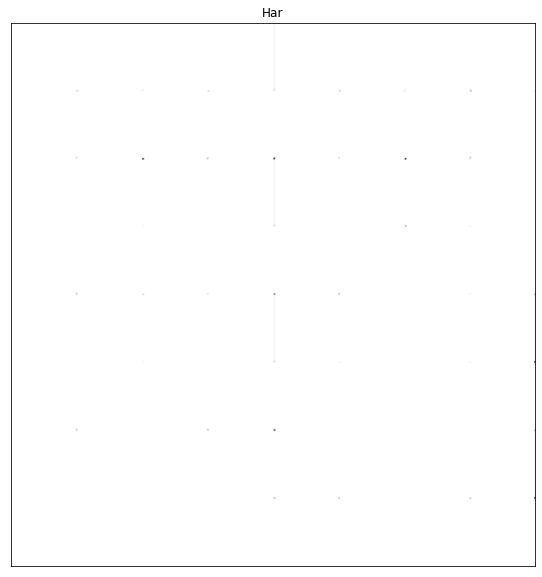

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(Har, cmap="gray")
plt.title("Har"), plt.xticks([]), plt.yticks([])

Varying the value of the threshold shows more or less horizontal and vertical lines (edges). The corners disappear along with the lines so we need to find an acceptable balance.

In [14]:
img = cv2.imread(path+"shapes.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. Computing the derivatives
I_x = cv2.Sobel(gray, ddepth=-1, dx=1, dy=0, ksize=5)  # np.diff(gray, axis=1)
I_y = cv2.Sobel(gray, ddepth=-1, dx=0, dy=1, ksize=5)  # np.diff(gray, axis=0)

# 2. Computing the square of the derivatives
I_x2 = I_x*I_x
I_y2 = I_y*I_y
I_xy = I_x*I_y

# 3. Applying gaussian filtering on the output of step 2
kernel = gaussian_kernel(3, sigma=2)
I_x2F = filtering(I_x2, kernel)
I_y2F = filtering(I_y2, kernel)
I_xyF = filtering(I_xy, kernel)

# 4. Computing the cornerness function response
k = 0.3
detH = I_x2F*I_y2F-(I_xyF*I_xyF)
trace = I_x2F + I_y2F
Har = detH-k*(trace**2)

(Text(0.5, 1.0, 'Har'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

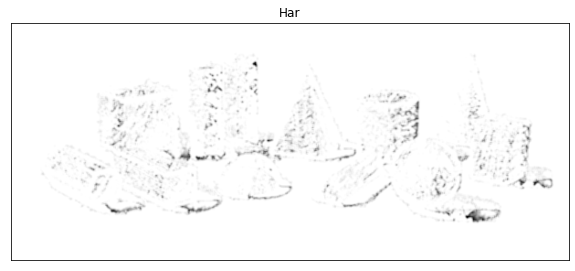

In [15]:
plt.figure(figsize=(10, 10))
plt.imshow(Har, cmap="gray")
plt.title("Har"), plt.xticks([]), plt.yticks([])

I had a lot of trouble finding an appropriate value for the threshold. I could not find one that highlights best the corners.

In [16]:
img = cv2.imread(path+"CLT_Office.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. Computing the derivatives
I_x = cv2.Sobel(gray, ddepth=-1, dx=1, dy=0, ksize=3)  # np.diff(gray, axis=1)
I_y = cv2.Sobel(gray, ddepth=-1, dx=0, dy=1, ksize=3)  # np.diff(gray, axis=0)

# 2. Computing the square of the derivatives
I_x2 = I_x*I_x
I_y2 = I_y*I_y
I_xy = I_x*I_y

# 3. Applying gaussian filtering on the output of step 2
kernel = gaussian_kernel(3, sigma=2)
I_x2F = filtering(I_x2, kernel)
I_y2F = filtering(I_y2, kernel)
I_xyF = filtering(I_xy, kernel)

# 4. Computing the cornerness function response
k = 0.06
detH = I_x2F*I_y2F-(I_xyF*I_xyF)
trace = I_x2F + I_y2F
Har = detH-k*(trace**2)

(Text(0.5, 1.0, 'Har'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

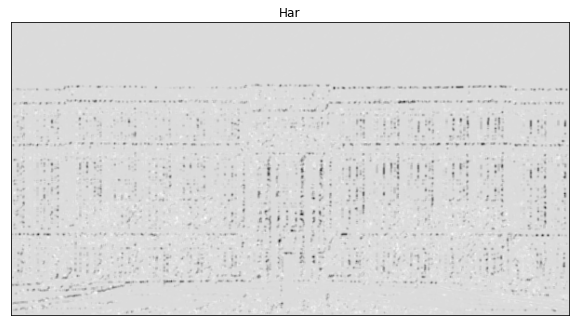

In [17]:
plt.figure(figsize=(10, 10))
plt.imshow(Har, cmap="gray")
plt.title("Har"), plt.xticks([]), plt.yticks([])

Here again, varying the threshold highlights more or less the edges of the windows along with the corners.

## 4. Image Stitching

(Text(0.5, 1.0, ''),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

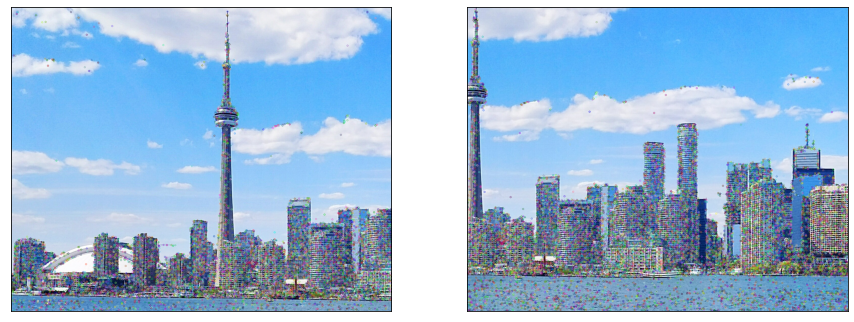

In [41]:
img1 = cv2.imread(path+"1Toronto.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(path+"2Toronto.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.imread(path+"3Toronto.jpg")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

sift = cv2.SIFT_create()
img1S, desc1 = sift.detectAndCompute(img1, None)
img2S, desc2 = sift.detectAndCompute(img2, None)

imgA = cv2.drawKeypoints(img1,img1S,imgA)
imgB = cv2.drawKeypoints(img2,img2S,imgB)

plt.figure(figsize=(15, 15))
plt.subplot(121), plt.imshow(imgA)
plt.title(""), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgB)
plt.title(""), plt.xticks([]), plt.yticks([])

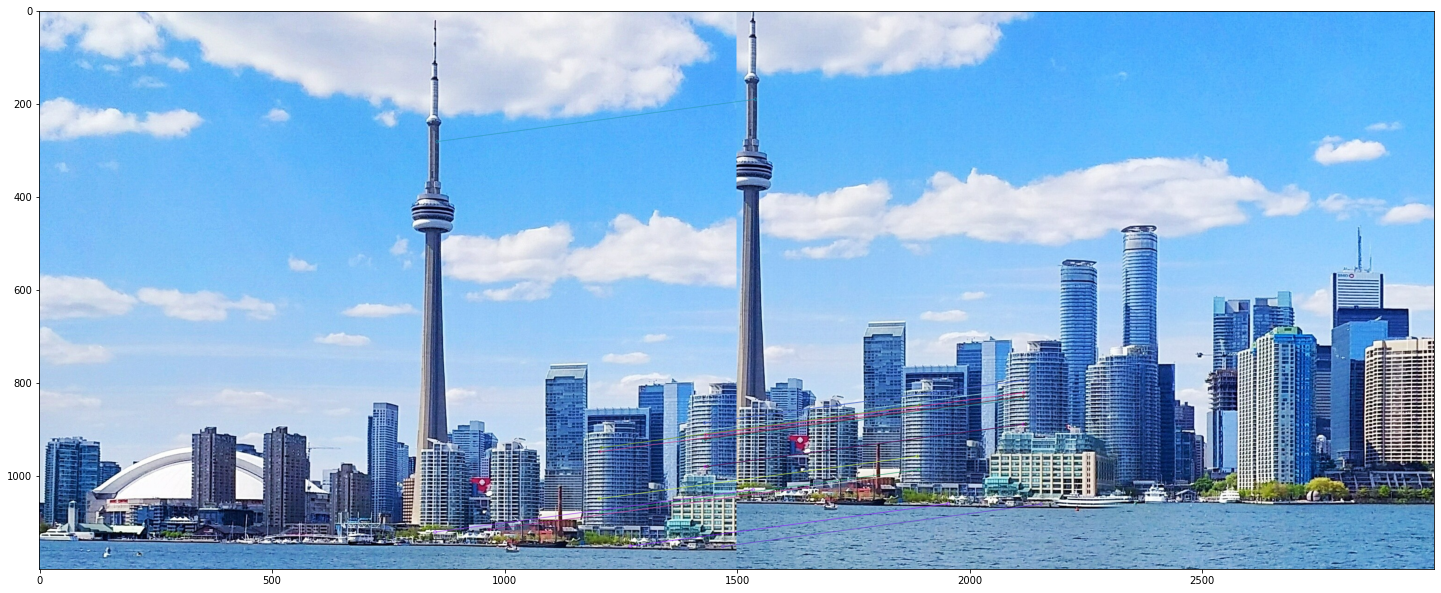

(<matplotlib.image.AxesImage at 0x7f9398bb11d0>, None)

In [42]:
matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = matcher.match(desc1, desc2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, img1S, img2, img2S, matches[:20], img2, flags=2)
plt.figure(figsize=(25, 25))
plt.imshow(img3),plt.show()